In [1]:
# import multiprocessing as mp
import numpy as np
import pandas as pd
from numba import njit, jit
import matplotlib.pyplot as plt
import seaborn as sb
import time
import pprint

# Import own code
from default_constants import *
from algorithms import *
from signal_data_class import *
# from interactive_trigger_class import *
from plot_data import *

sb.set()
pp = pprint.PrettyPrinter(indent=4)

SN1 = "../data/SN1_Chirp_300kHzTemplate_0p16SNR_280Start_Sig.npy"  # Nasty noise
SN2 = "../data/SN2_Chirp_300kHzTemplate_0p32SNR_280Start_Sig.npy"  # Nice noise
SX1 = "../data/SX1_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_99mV.npy"
SX2 = "../data/SX2_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_132mV.npy"
SX3 = "../data/SX3_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_264mV.npy"
XN1 = "../data/XN1_Chirp_300kHzTemplate_0p16SNR_280Start_Noise.npy"
XN2 = "../data/XN2_Chirp_300kHzTemplate_0p32SNR_280Start_Noise.npy"


In [2]:
data = {}
# data["SN1"] = np.array(list( zip(*np.load(SN1)) ))
# data["SN2"] = np.array(list( zip(*np.load(SN2)) ))
data["SX1"] = np.array(list( zip(*np.load(SX1)) ))
# data["SX2"] = np.array(list( zip(*np.load(SX2)) ))
# data["SX3"] = np.array(list( zip(*np.load(SX3)) ))
data["XN1"] = np.array(list( zip(*np.load(XN1)) ))
data["XN2"] = np.array(list( zip(*np.load(XN2)) ))

SX1_truth_data_df = pd.read_csv("../data/SX1_truth_data.csv")
SX1_truth_data = SX1_truth_data_df.truth_data


In [3]:
# # Create truth data for SX1

# # Find position of chirp per cycle

# t = data["SX1"][0]
# sig = data["SX1"][1]

# sample_spacing = 1e-6
# pulse_spacing = 2e-3  # 2ms
# print("sample_spacing", sample_spacing)
# print("pulse_spacing", pulse_spacing, "(2ms)")
# print()

# samples_per_chirp = int(pulse_spacing / sample_spacing)
# samples = len(t)
# chirp_no = samples / samples_per_chirp

# print("samples_per_chirp:", samples_per_chirp)
# print("samples:", samples)
# print("chirp_no:", chirp_no)

# samples_trunc = samples - (samples % samples_per_chirp)
# chirp_no_trunc = samples_trunc // samples_per_chirp
# print("samples_trunc:", samples_trunc)
# print("chirp_no_trunc:", chirp_no_trunc)

# t_trunc = t[:samples_trunc]
# sig_trunc = sig[:samples_trunc]

# chirp_sections = []
# for i in range(chirp_no_trunc-1):
#     section_start = samples_per_chirp * i
#     section_end = samples_per_chirp * (i + 1)
#     t_section = t[section_start:section_end]
#     sig_section = sig[section_start:section_end]
#     chirp_section = (t_section, sig_section)
#     chirp_sections.append(chirp_section)

# tops = []
# for t_section, sig_section in chirp_sections:
#     max_idx = np.argmax(sig_section)
#     tops.append(max_idx)

# print()
# mean = int(np.mean((tops)))
# print("mean:", mean)

# fig, axis = plt.subplots()
# axis.hist(tops, bins="auto")

# # Create truth data
# SX1_truth_data = np.zeros(1006484)
# for i in range(chirp_no_trunc):
#     idx_of_chirp = samples_per_chirp * i + mean
#     SX1_truth_data[idx_of_chirp] = True


In [4]:
t1 = SignalData(data["SX1"],
                truth_data = SX1_truth_data,
                zero_detector_alg=zero_detector2,
                slice_start = 0,
                slice_end = 50000,
               )

inv_frac_vals = np.arange(1, 6, 0.5)
delay_samples_vals = np.arange(50, 250, 25)

start = time.time()
t1_all_test_params = t1.get_performance(inv_frac_vals = inv_frac_vals,
                                        delay_samples_vals = delay_samples_vals,
                                        tolerance = 100e-6,
                                        verbose = True,
                                       )
end = time.time()
print("Elapsed: ", end-start)


t1_pd = pd.DataFrame(t1_all_test_params)  # Faster to pass list of dicts than to add rows iteratively
t1_pd.to_csv("t1_performance_data.csv.temp")


C:\Users\roysi\AppData\Local\Programs\Python\Python311\Lib\site-packages\numba\core\typed_passes.py:334: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "algorithms.py", line 22:
# @make_typed
def lp_filter(x_all, DECAY_FULL_POWER=10, DECAY_PART=900):
^

  warnings.warn(errors.NumbaPerformanceWarning(msg,
C:\Users\roysi\AppData\Local\Programs\Python\Python311\Lib\site-packages\numba\core\ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'x_all' of function 'lp_filter'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "algorithms.py", line 22:
# @make_typ

.......... 50
..........
.......... 75
..........
.......... 100
..........
.......... 125
..........
.......... 150
..........
.......... 175
..........
.......... 200
..........
.......... 225
..........
computation completed
Elapsed:  15.900408029556274


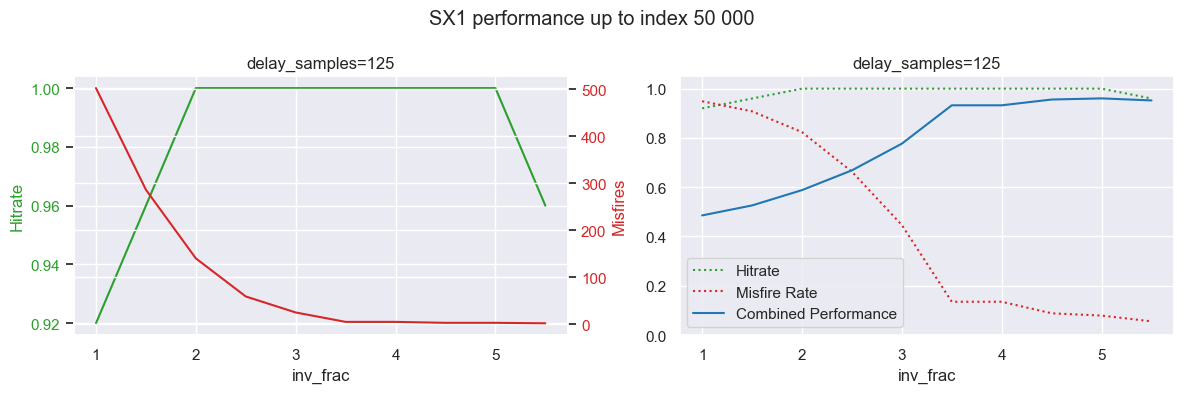

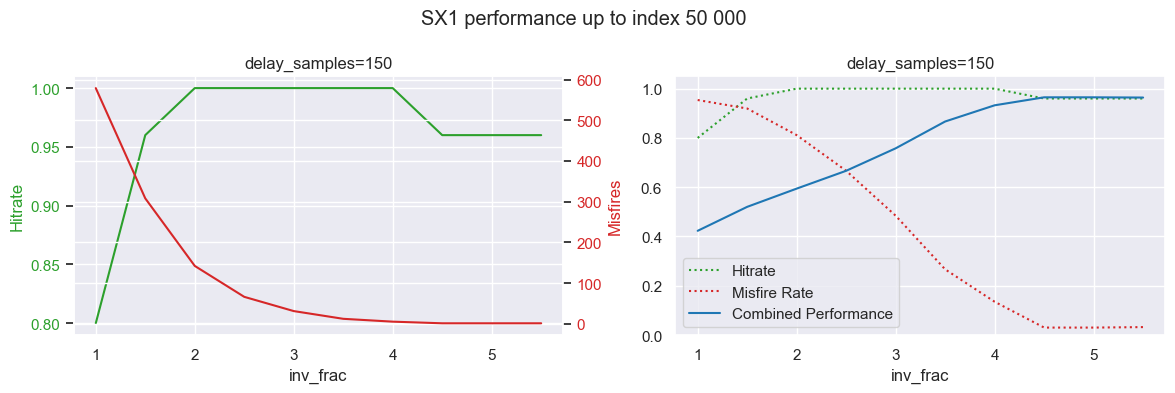

In [5]:
t1_pd_analyse = pd.read_csv("t1_performance_data.csv.temp")

for delay_samples in delay_samples_vals[3:5]:
    plot_inv_frac(t1_pd_analyse, delay_samples=delay_samples, title="SX1 performance up to index 50 000")


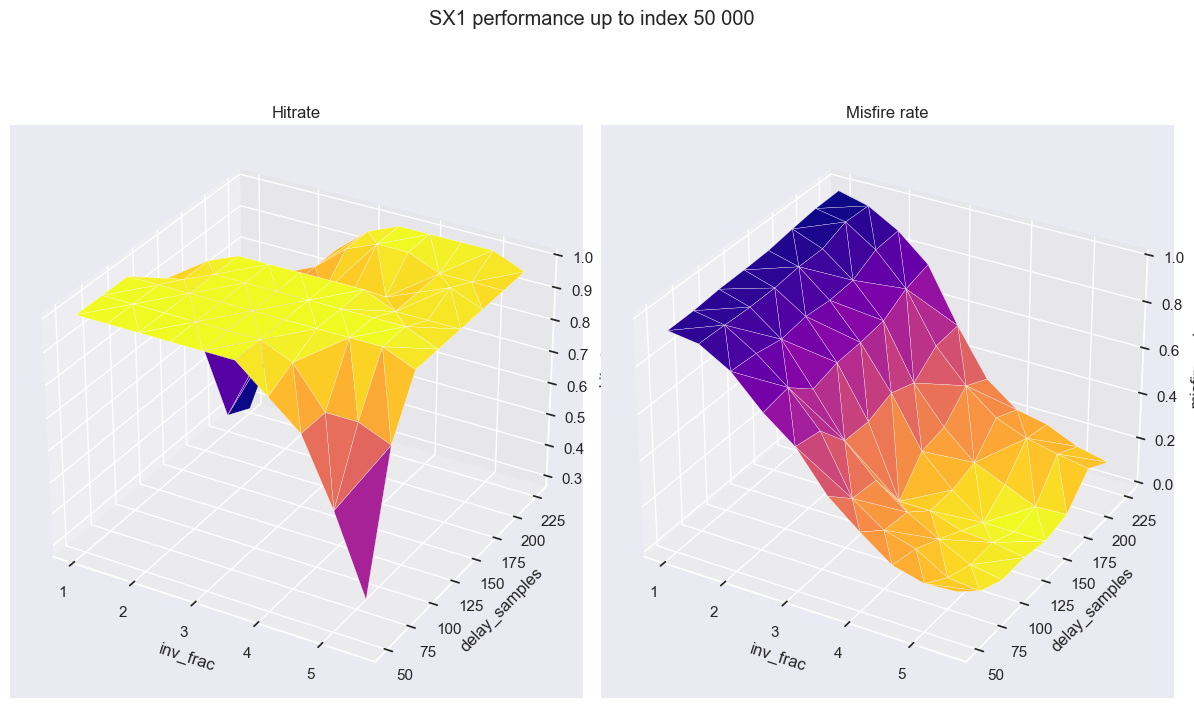

In [6]:
t1_pd_analyse = pd.read_csv("t1_performance_data.csv.temp")
plot_all_3d(t1_pd_analyse, title="SX1 performance up to index 50 000")
print()


In [ ]:
t2 = SignalData(data["SX1"], 
                truth_data = SX1_truth_data,
                zero_detector_alg=zero_detector2,
               )

inv_frac_vals = np.arange(2, 7 + 0.25, 0.25)  # Add step size to endpoint to include endpoint
delay_samples_vals = np.arange(50, 350 + 15, 15)  # Add step size to endpoint to include endpoint

start = time.time()
t2_all_test_params = t2.get_performance(inv_frac_vals = inv_frac_vals,
                                        delay_samples_vals = delay_samples_vals,
                                        tolerance = 100e-6,
                                        verbose = True,
                                       )
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

t2_pd = pd.DataFrame(t2_all_test_params)  # Faster to pass list of dicts than to add rows iteratively
t2_pd.to_csv("t2_performance_data.csv.temp")


..................... 50
.....................
..................... 65
.....................
..................... 80
.....................
..................... 95
.....................
..................... 110
.....................
..................... 125
.

In [ ]:
t2_pd_analyse = pd.read_csv("t2_performance_data.csv.temp")

plot_inv_frac(t2_pd_analyse, delay_samples=125, title="SX1 performance full range, zd2")
plot_inv_frac(t2_pd_analyse, delay_samples=140, title="SX1 performance full range, zd2")
plot_inv_frac(t2_pd_analyse, delay_samples=305, title="SX1 performance full range, zd2")
plot_all_3d(t2_pd_analyse, title="SX1 performance full range, zd2, numba!")
print()


In [ ]:
# Make sig + noise, SX1+XN2 (nice noise), using SX1 truth data

SX1_t, SX1_sig = data["SX1"]
XN2_t, XN2_sig = data["XN2"]

print("len(SX1_t):", len(SX1_t))
print("len(XN1_t):", len(XN2_t))
trim = min(len(SX1_t), len(XN2_t))
SX1_sig = np.array(SX1_sig[:trim])
XN2_sig = np.array(XN2_sig[:trim])
print(f"Is time series (trimmed to [:{trim}]) of SX1 & XN2 the same?:", SX1_sig == XN2_sig)

combo_t = SX1_t[:trim]
combo_sig = SX1_sig + XN2_sig

data["SX1+XN2"] = [combo_t, combo_sig]

# Make sig + noise, SX1+XN1 (nasty noise), using SX1 truth data

SX1_t, SX1_sig = data["SX1"]
XN1_t, XN1_sig = data["XN1"]

print("len(SX1_t):", len(SX1_t))
print("len(XN1_t):", len(XN1_t))
trim = min(len(SX1_t), len(XN1_t))
SX1_sig = np.array(SX1_sig[:trim])
XN1_sig = np.array(XN1_sig[:trim])
print(f"Is time series (trimmed to [:{trim}]) of SX1 & XN1 the same?:", SX1_sig == XN1_sig)

combo_t = SX1_t[:trim]
combo_sig = SX1_sig + XN1_sig

data["SX1+XN1"] = [combo_t, combo_sig]


In [ ]:
# image2 = InteractiveTrigger(
#         data["SX1+XN1"],
#         slice_start=0,
#         slice_end=3000,
#         zero_detector_alg=zero_detector2,
#     )

# interact(image2.update,
#       delay_samples=widgets.IntSlider(min=0, max=300, step=1, value=DELAY_SAMPLES), 
#       inv_frac=widgets.FloatSlider(min=0, max=6, step=0.1, value=INV_FRAC)
#     )


In [ ]:
t3 = SignalData(data["SX1+XN2"], 
                truth_data = SX1_truth_data,
                zero_detector_alg=zero_detector2,
               )

inv_frac_vals = np.arange(2, 7 + 0.25, 0.25)  # Add step size to endpoint to include endpoint
delay_samples_vals = np.arange(50, 350 + 15, 15)  # Add step size to endpoint to include endpoint

start = time.time()
t3_all_test_params = t3.get_performance(inv_frac_vals = inv_frac_vals,
                                        delay_samples_vals = delay_samples_vals,
                                        tolerance = 100e-6,
                                        verbose = True,
                                       )
end = time.time()
print("Elapsed:", (end - start))

t3_pd = pd.DataFrame(t3_all_test_params)  # Faster to pass list of dicts than to add rows iteratively
t3_pd.to_csv("t3_performance_data.csv.temp")


In [ ]:
t3_pd_analyse = pd.read_csv("t3_performance_data.csv.temp")
plot_all_3d(t3_pd_analyse, title="SX1+XN2 with SX1 truth data performance, full range, zd2")
print()


In [ ]:
t4 = SignalData(data["SX1+XN1"], 
                truth_data = SX1_truth_data,
                zero_detector_alg=zero_detector2,
               )

inv_frac_vals = np.arange(2, 7 + 0.25, 0.25)  # Add step size to endpoint to include endpoint
delay_samples_vals = np.arange(50, 350 + 15, 15)  # Add step size to endpoint to include endpoint

start = time.time()
t4_all_test_params = t4.get_performance(inv_frac_vals = inv_frac_vals,
                                        delay_samples_vals = delay_samples_vals,
                                        tolerance = 100e-6,
                                        verbose = True,
                                       )
end = time.time()
print("Elapsed:", (end - start))

t4_pd = pd.DataFrame(t4_all_test_params)  # Faster to pass list of dicts than to add rows iteratively
t4_pd.to_csv("t4_performance_data.csv.temp")


In [ ]:
t4_pd_analyse = pd.read_csv("t4_performance_data.csv.temp")
plot_all_3d(t4_pd_analyse, title="SX1+XN1 with SX1 truth data performance, full range, zd2")
print()


In [ ]:
t5 = SignalData(data["SX1+XN2"], 
                truth_data = SX1_truth_data,
                zero_detector_alg=zero_detector2,
               )

t5_inv_frac_vals = np.arange(0, 10 + 1, 1)  # Add step size to endpoint to include endpoint
t5_delay_samples_vals = np.arange(50, 350 + 5, 5)  # Add step size to endpoint to include endpoint

start = time.time()
t5_all_test_params = t5.get_performance(inv_frac_vals = t5_inv_frac_vals,
                                        delay_samples_vals = t5_delay_samples_vals,
                                        tolerance = 100e-6,
                                        verbose = True,
                                       )
end = time.time()
print("Elapsed:", (end - start))

t5_pd = pd.DataFrame(t5_all_test_params)  # Faster to pass list of dicts than to add rows iteratively
t5_pd.to_csv("t5_performance_data.csv.temp")


In [ ]:
t5_pd_analyse = pd.read_csv("t5_performance_data.csv.temp")
plot_all_3d(t5_pd_analyse, title="SX1+XN2 with SX1 truth data performance, full range, zd2")
print()


In [ ]:
t6 = SignalData(data["SX1+XN1"], 
                truth_data = SX1_truth_data,
                zero_detector_alg=zero_detector2,
               )

t6_inv_frac_vals = np.arange(0, 10 + 1, 1)  # Add step size to endpoint to include endpoint
t6_delay_samples_vals = np.arange(50, 350 + 5, 5)  # Add step size to endpoint to include endpoint

start = time.time()
t6_all_test_params = t6.get_performance(inv_frac_vals = t6_inv_frac_vals,
                                        delay_samples_vals = t6_delay_samples_vals,
                                        tolerance = 100e-6,
                                        verbose = True,
                                       )
end = time.time()
print("Elapsed:", (end - start))

t6_pd = pd.DataFrame(t5_all_test_params)  # Faster to pass list of dicts than to add rows iteratively
t6_pd.to_csv("t6_performance_data.csv.temp")


In [ ]:
t6_pd_analyse = pd.read_csv("t6_performance_data.csv.temp")
plot_all_3d(t6_pd_analyse, title="SX1+XN1 with SX1 truth data performance, full range, zd2")
print()
